<a href="https://colab.research.google.com/github/aeroadriano/AluraBootcamp-DataScience/blob/main/notebook/DesafioAula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Carregar .csv
data = pd.read_csv('https://github.com/aeroadriano/AluraBootcamp-DataScience/blob/main/data/A165157189_28_143_208_atendimento.csv?raw=True",?raw=True', 
                    encoding='ISO-8859-1',
                    sep=';', decimal=',', thousands='.',
                    skiprows=3, skipfooter=12,
                    engine='python')

In [3]:
colunas_usaveis = data.mean().index.tolist()  # Média retorna apenas colunas com valores. Cria uma lista com o índice
colunas_usaveis.insert(0, 'Unidade da Federação') # Insere a coluna 'Unidade da Federação' na posição 0

usaveis = data[colunas_usaveis] # Subgrupo das colunas definidas no passo anterior
usaveis = usaveis.set_index('Unidade da Federação') # Define a coluna 'Unidade da Federação' como índice
usaveis = usaveis.drop('Total', axis=1) # Elimina a coluna 'Total' do eixo das colunas

usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2688315.70,2740952.07,247

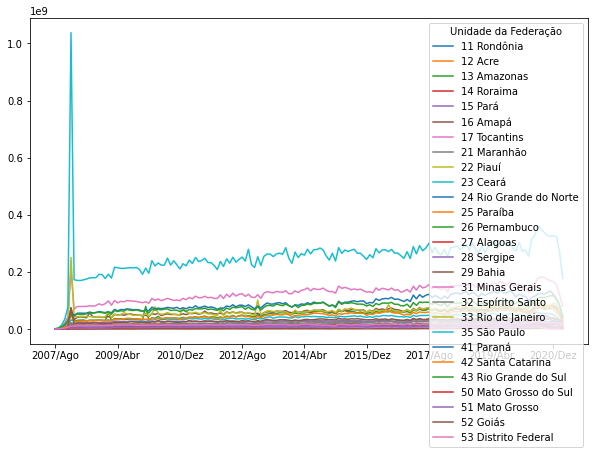

In [4]:
usaveis.T.plot(figsize=(10,6))  # Plot da transposta de usaveis

# Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada

# Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência

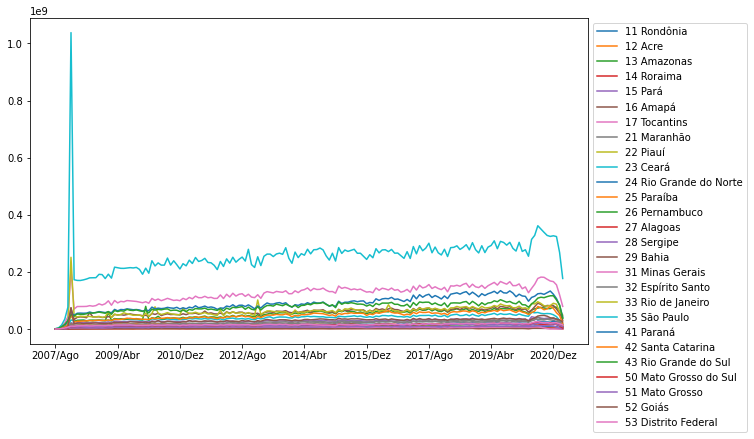

In [5]:
usaveis.T.plot(figsize=(10,6))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [6]:
data['Unidade da Federação'] = data['Unidade da Federação'].str[3:] # Retira os números dos nomes das UFs

colunas_usaveis = data.mean().index.tolist()  # Média retorna apenas colunas com valores. Cria uma lista com o índice
colunas_usaveis.insert(0, 'Unidade da Federação') # Insere a coluna 'Unidade da Federação' na posição 0

usaveis = data[colunas_usaveis] # Subgrupo das colunas definidas no passo anterior
usaveis = usaveis.set_index('Unidade da Federação') # Define a coluna 'Unidade da Federação' como índice
usaveis = usaveis.drop('Total', axis=1) # Elimina a coluna 'Total' do eixo das colunas

In [7]:
# Obtendo os 5 estados com os maiores gastos
UFs = data[colunas_usaveis].set_index('Unidade da Federação').sort_values('Total',ascending=False).index[:5]

# Prepara tabela que será plotada
chart = usaveis.loc[UFs]

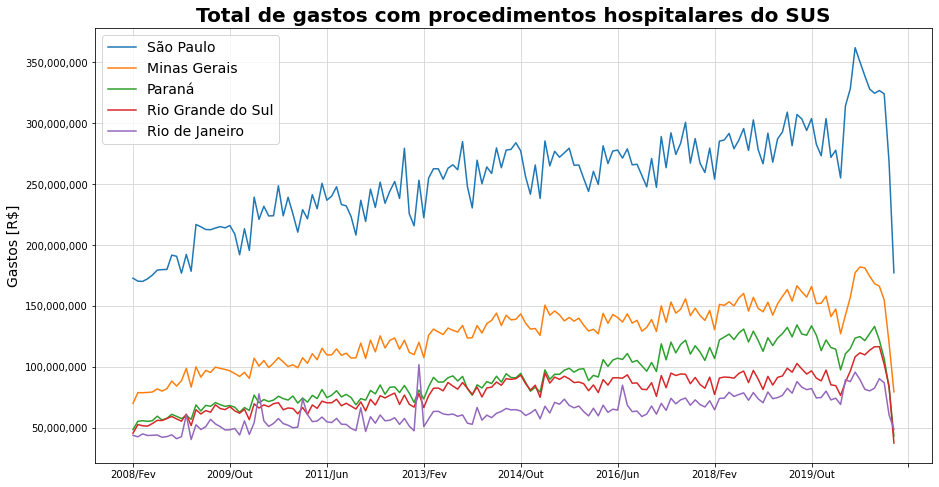

In [8]:
# Formata eixo, título, labels e legenda
ax = chart.T[6:].plot(figsize=(15,8)) # Removido os outliers à esquerda
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Total de gastos com procedimentos hospitalares do SUS", fontsize=20, fontweight='bold')
ax.set_ylabel("Gastos [R$]", fontsize=14)
ax.grid(color='lightgrey')
plt.legend(loc='best', fontsize=14)

# Renderiza
plt.show()